In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/CSV FILES/height-weight.csv")

In [4]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

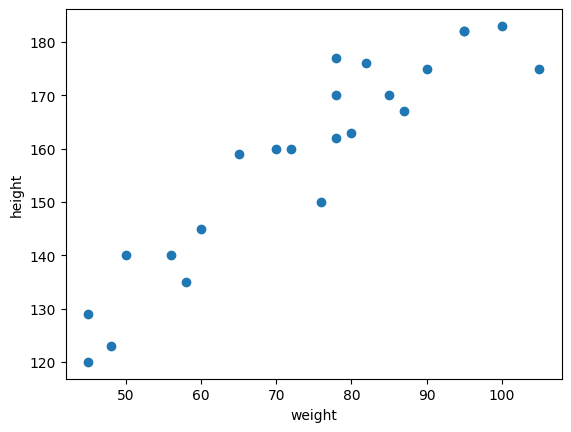

In [5]:
# Scatter plot
plt.scatter(data['Weight'],data['Height'])
plt.xlabel("weight")
plt.ylabel("height")

In [6]:
#correlation - whether the relationship is positive or negative
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


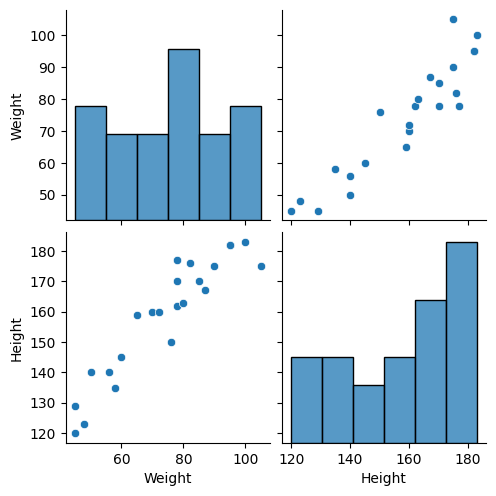

In [7]:
# seaborn - pairplot
sns.pairplot(data)

In [8]:
# independent and dependent feature
X = data[['Weight']] # always make sure that independent feature should be dataframe or should be a 2-D array
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
np.array(X).shape

(23, 1)

In [10]:
# np.array(X)

'''
array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

'''

'\narray([[ 45],\n       [ 58],\n       [ 48],\n       [ 60],\n       [ 70],\n       [ 78],\n       [ 80],\n       [ 90],\n       [ 95],\n       [ 78],\n       [ 82],\n       [ 95],\n       [105],\n       [100],\n       [ 85],\n       [ 78],\n       [ 50],\n       [ 65],\n       [ 76],\n       [ 87],\n       [ 45],\n       [ 56],\n       [ 72]])\n\n'

In [11]:
# A = data['Weight']
# A

'''
	Weight
0	45
1	58
2	48
3	60
4	70
5	78
6	80
7	90
8	95
9	78
10	82
11	95
12	105
13	100
14	85
15	78
16	50
17	65
18	76
19	87
20	45
21	56
22	72

dtype: int64

'''

'\n\tWeight\n0\t45\n1\t58\n2\t48\n3\t60\n4\t70\n5\t78\n6\t80\n7\t90\n8\t95\n9\t78\n10\t82\n11\t95\n12\t105\n13\t100\n14\t85\n15\t78\n16\t50\n17\t65\n18\t76\n19\t87\n20\t45\n21\t56\n22\t72\n\ndtype: int64\n\n'

In [12]:
# type(A)
# --> pandas.core.series.Series

In [13]:
# np.array(A).shape
'''(23,)'''

'(23,)'

In [14]:
# dependent feature
y = data['Height'] # this can be in series or in 1-D array
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [15]:
np.array(y).shape

(23,)

In [16]:
# train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

In [19]:
X_train.shape

(17, 1)

In [23]:
# standardization --> apply to input feature
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [30]:
y_train

,Height
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150
16,140


In [31]:
# Apply linear regression
regression = LinearRegression(n_jobs=-1)

In [32]:
model = regression.fit(X_train , y_train)

In [33]:
model

LinearRegression(n_jobs=-1)

In [36]:
model.coef_

array([17.2982057])

In [37]:
model.intercept_

156.47058823529412

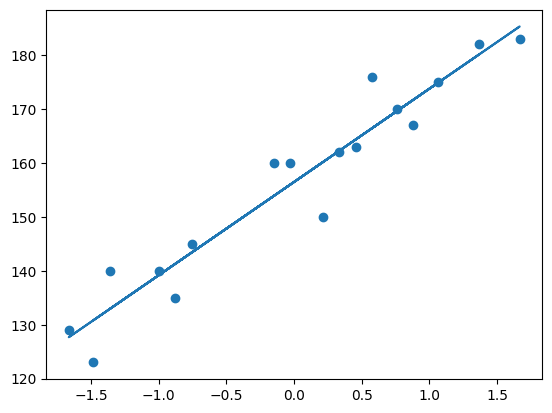

In [40]:
# plot the best fit line with respect to Training data
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

In [41]:
y_pred = model.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [42]:
# performance matrics
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [43]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [44]:
# r squared
from sklearn.metrics import r2_score

In [45]:
score = r2_score(y_test,y_pred)

In [46]:
score

0.7360826717981276

In [47]:
# adjusted r square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [48]:
# ols technique
import statsmodels.api as sm

In [49]:
model1 = sm.OLS(y_train,X_train).fit()

In [52]:
prediction = model1.predict(X_test)

In [53]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [55]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 05 Oct 2024   Prob (F-statistic):                       0.664
Time:                        09:54:34   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [56]:
# prediction for new data
model.predict([[72]])

array([1401.94139895])

In [58]:
model.predict(scaler.transform([[72]])) #--> scaling is required

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])